In [8]:
import pyro
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

from msc.prior_utils import get_events_df_from_config, events_df_to_circadian_hist
from msc.plot_utils import set_size
from msc.config_utils import config
from msc.time_utils import SEC, MIN, HOUR

plt.style.use(['science', 'no-latex'])
plt.viridis();

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<Figure size 252x189 with 0 Axes>

## Part I - Sample data from $p(E | \theta)$, a constant mixture of Gaussians 

In [2]:
# generate data
n_samples = 100 * np.array([600, 400, 1])
centers = np.array([[0], [3], [5]])
X, y = make_blobs(n_samples=n_samples, centers=centers, n_features=1, random_state=0)


In [3]:
# discretize for histogram
bins = np.linspace(-8, 8, 100, endpoint=True)
count, bins = np.histogram(X, bins=bins)


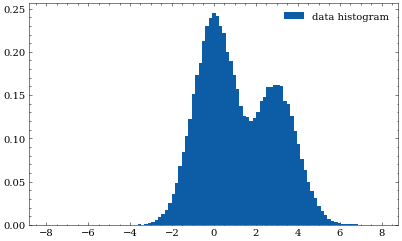

In [4]:
# plot density log likelihood
width = 478  # pt
fig, axes = plt.subplots(1, figsize=set_size(width))

theta = bins

axes.hist(X, bins=bins, label='data histogram', density=True, zorder=2)

axes.legend()

plt.show()

## Part II - $p(S | t, \phi)$
Prior estimation of seizure at time t under circadian profile $\phi$.
 


In [5]:
config['n_vm_kernels']

24

In [6]:
events_df = get_events_df_from_config()

I004_A0003_D001


In [7]:
events_df

,datetime,year,month,day,hour,minute,second
0,2009-08-13 22:36:39.606445+00:00,2009,8,13,22,36,39
1,2009-08-14 06:40:27.926757+00:00,2009,8,14,6,40,27
2,2009-08-14 11:28:03.761718+00:00,2009,8,14,11,28,3
3,2009-08-14 21:00:07.248047+00:00,2009,8,14,21,0,7
4,2009-09-11 22:27:54.582031+00:00,2009,9,11,22,27,54
5,2009-09-12 03:07:01.920898+00:00,2009,9,12,3,7,1
6,2009-09-12 07:57:10.905273+00:00,2009,9,12,7,57,10
7,2009-09-12 13:32:34.538086+00:00,2009,9,12,13,32,34
8,2009-09-12 17:32:10.563476+00:00,2009,9,12,17,32,10
9,2009-09-12 20:12:00.919922+00:00,2009,9,12,20,12,0


In [9]:
events_df_to_circadian_hist(events_df)

array([2, 1, 1, 3, 2, 5, 1, 3, 2, 2, 1, 2, 2, 1, 2, 1, 3, 2, 1, 2, 4, 2])

In [ ]:
# stopped here